# Анализ временных рядов

## 1. Проанализируйте тенденцию создания сделок с течением времени и их связь с звонками.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

deals_df = pd.read_pickle("deals_cleaned_v3.pkl")

deals_df.set_index('Created Time', inplace=True)
deals_df.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Create_to_Close_Days,SLA_range
Created Time,,,,,,,,,,,,,,,,,,,,,
2024-06-21 15:30:00,5805028000056864695,Ben Hall,NaT,B - Medium,New Lead,NaN,/eng/test,03.07.23women,NaT,v16,...,NaN,<NA>,NaN,NaN,5805028000056849495,NaN,NaN,2024-06-21,NaN,NaN
2024-06-21 15:23:00,5805028000056859489,Ulysses Adams,NaT,B - Medium,New Lead,NaN,/at-eng,NaN,NaT,NaN,...,6,<NA>,NaN,2000.0,5805028000056834471,NaN,NaN,2024-06-21,NaN,NaN
2024-06-21 14:45:00,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_at,0 days 00:26:43,b1-at,...,NaN,<NA>,NaN,NaN,5805028000056854421,NaN,NaN,2024-06-21,0.0,Medium (15-30 min)
2024-06-21 13:32:00,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_de,0 days 01:00:04,bloggersvideo14com,...,NaN,<NA>,NaN,NaN,5805028000056889351,NaN,NaN,2024-06-21,0.0,Very slow (>60 min)
2024-06-21 13:21:00,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_de,0 days 00:53:12,website,...,NaN,<NA>,NaN,NaN,5805028000056876176,NaN,NaN,2024-06-21,0.0,Slow (30-60 min)


In [33]:
# Sort by Created Time
deals_df.sort_index(inplace=True)

In [34]:
# Check results
print(deals_df.index[:5])
print(deals_df.index[-5:])

DatetimeIndex(['2023-07-03 17:03:00', '2023-07-03 20:17:00',
               '2023-07-03 20:39:00', '2023-07-04 07:10:00',
               '2023-07-04 07:10:00'],
              dtype='datetime64[ns]', name='Created Time', freq=None)
DatetimeIndex(['2024-06-21 13:21:00', '2024-06-21 13:32:00',
               '2024-06-21 14:45:00', '2024-06-21 15:23:00',
               '2024-06-21 15:30:00'],
              dtype='datetime64[ns]', name='Created Time', freq=None)


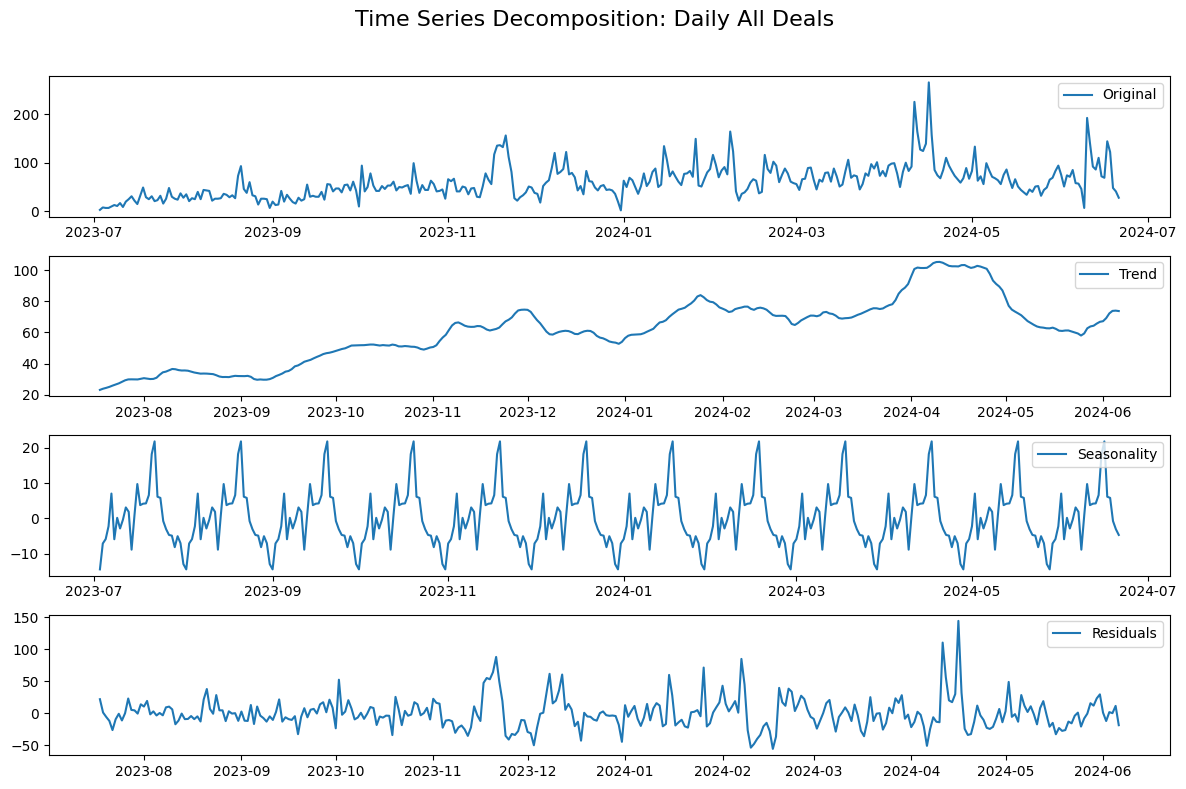

In [35]:
# Aggregate: count the number of transactions each day
daily_deals = deals_df.resample("D").size()  # time series by days
# Decomposition of the time series (period - 30, if we think that there is monthly seasonality)
decomposition = seasonal_decompose(daily_deals, model='additive', period=30)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.suptitle('Time Series Decomposition: Daily All Deals', fontsize=16) 
plt.subplot(411)
plt.plot(daily_deals, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [36]:
# Filter only successful transactions
successful_df = deals_df[deals_df['Stage'] == 'Payment Done']
successful_df.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Create_to_Close_Days,SLA_range
Created Time,,,,,,,,,,,,,,,,,,,,,
2023-07-04 10:11:00,5805028000000947046,Oliver Taylor,2023-07-12,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_de,71 days 00:46:22,b3,...,11,11,1000.0,11000.0,5805028000000939010,Hamburg,NaN,2023-07-04,8.0,Very slow (>60 min)
2023-07-08 08:56:00,5805028000001401001,Oliver Taylor,2023-07-16,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_de,0 days 02:22:36,b3,...,11,8,1000.0,11500.0,5805028000001350049,NaN,NaN,2023-07-08,8.0,Very slow (>60 min)
2023-07-15 13:27:00,5805028000001885076,Jane Smith,2023-08-31,A - High,Payment Done,NaN,eng/digital-marketing,04.07.23recentlymoved_de,0 days 00:13:31,b2,...,11,11,450.0,4000.0,5805028000001880249,Ingolstadt,NaN,2023-07-15,47.0,Fast (5-15 min)
2023-07-17 18:02:00,5805028000001987082,Julia Nelson,2023-07-17,C - Low,Payment Done,Conditions are not suitable,eng/digital-marketing,12.07.2023wide_de,0 days 00:49:16,v3com,...,11,11,1000.0,11000.0,5805028000001986077,NaN,B1,2023-07-17,0.0,Slow (30-60 min)
2023-07-18 21:11:00,5805028000002302112,Julia Nelson,2023-07-19,C - Low,Payment Done,Expensive,eng/digital-marketing,performancemax_digitalmarkt_ru_de,0 days 15:24:52,_{region_name}_,...,6,2,1000.0,5000.0,5805028000002302109,Wolfsburg,B1,2023-07-18,1.0,Very slow (>60 min)


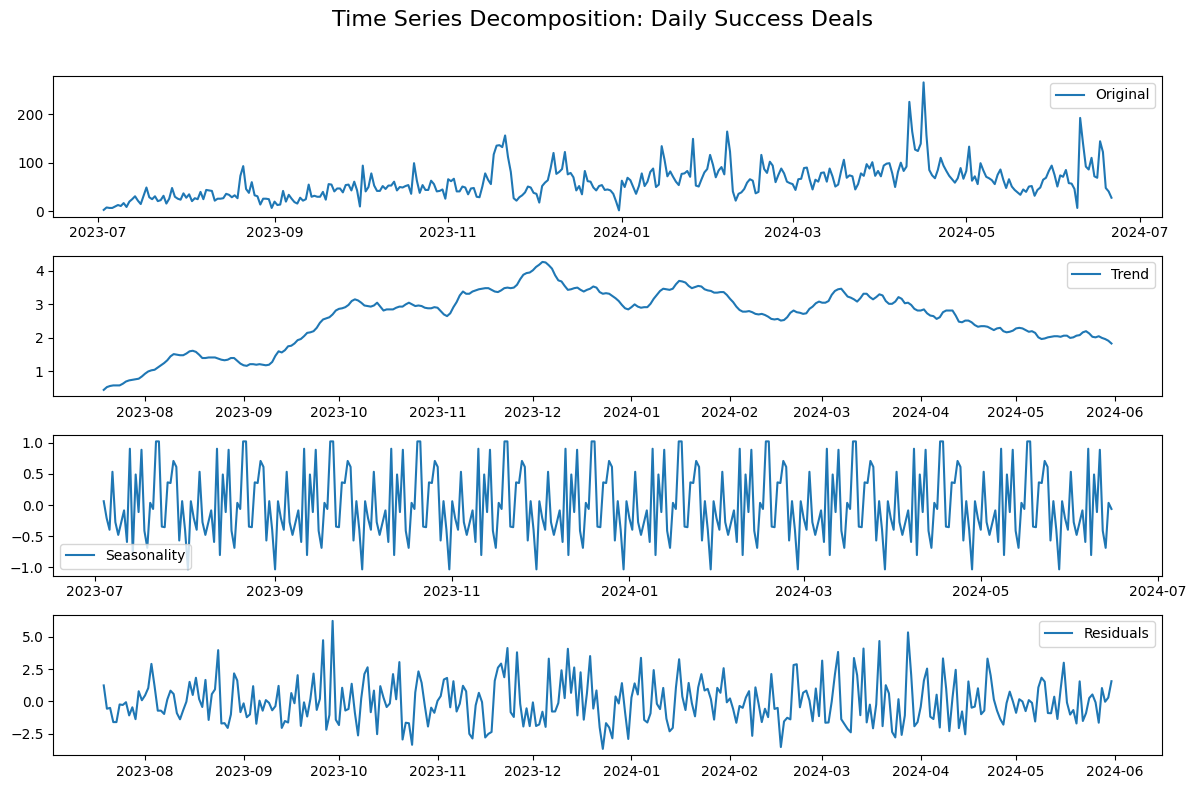

In [37]:
# Group by days and count the number of successful transactions
daily_success_deals = successful_df.resample("D").count()['Id']  # Series

# Decomposition of the time series (for example, with monthly seasonality)
decomposition = seasonal_decompose(daily_success_deals, model='additive', period=30)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Vizualization
plt.figure(figsize=(12, 8))
plt.suptitle('Time Series Decomposition: Daily Success Deals', fontsize=16) 
plt.subplot(411)
plt.plot(daily_deals, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

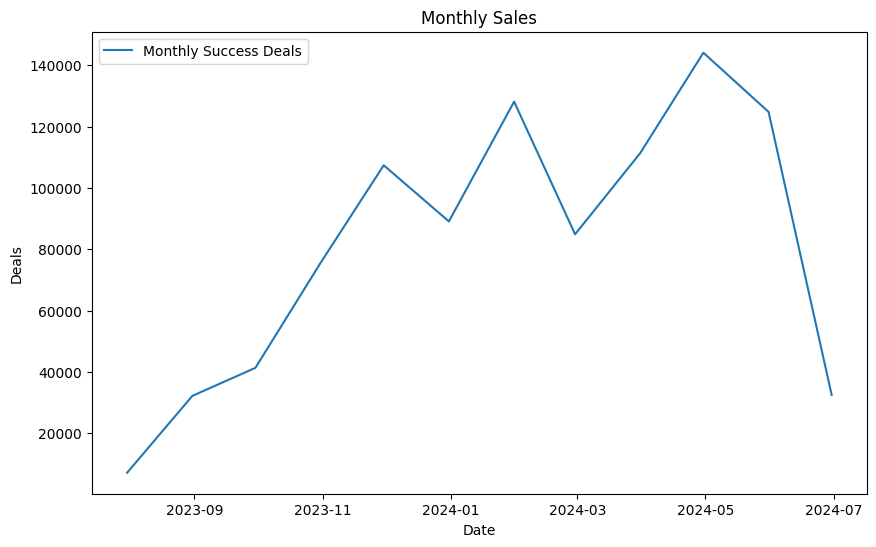

In [38]:
# Aggregate sales by month
monthly_sales = successful_df['Initial Amount Paid'].resample('ME').sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Success Deals')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Deals')
plt.legend()
plt.show()

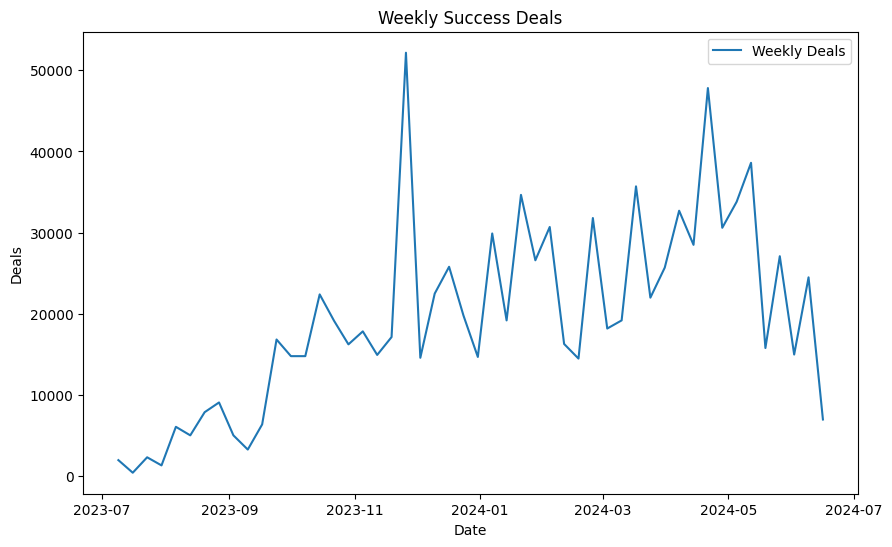

In [39]:
# Aggregate sales by week
weekly_sales = successful_df['Initial Amount Paid'].resample('W').sum()

plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Weekly Deals')
plt.title('Weekly Success Deals')
plt.xlabel('Date')
plt.ylabel('Deals')
plt.legend()
plt.show()

In [40]:
calls_df = pd.read_pickle("calls_cleaned_v1.pkl")
calls_df = calls_df.set_index('Call Start Time')
calls_df

,Id,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM,Call Data,Start Time Of Call,Call Duration Range
Call Start Time,,,,,,,,,,,
2023-06-30 08:43:00,5805028000000805001,John Doe,NaN,Inbound,171,Received,NaN,False,2023-06-30,08:43:00,1–3 min
2023-06-30 08:46:00,5805028000000768006,John Doe,NaN,Outbound,28,Attended Dialled,Completed,False,2023-06-30,08:46:00,15–60 sec
2023-06-30 08:59:00,5805028000000764027,John Doe,NaN,Outbound,24,Attended Dialled,Completed,False,2023-06-30,08:59:00,15–60 sec
2023-06-30 09:20:00,5805028000000787003,John Doe,5805028000000645014,Outbound,6,Attended Dialled,Completed,False,2023-06-30,09:20:00,3–15 sec
2023-06-30 09:30:00,5805028000000768019,John Doe,5805028000000645014,Outbound,11,Attended Dialled,Completed,False,2023-06-30,09:30:00,3–15 sec
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-21 15:30:00,5805028000056889515,Ulysses Adams,5805028000056564231,Outbound,6,Attended Dialled,Completed,False,2024-06-21,15:30:00,3–15 sec
2024-06-21 15:30:00,5805028000056875317,Victor Barnes,5805028000054867023,Outbound,8,Attended Dialled,Completed,False,2024-06-21,15:30:00,3–15 sec
2024-06-21 15:30:00,5805028000056832495,Kevin Parker,5805028000010617278,Outbound,5,Attended Dialled,Completed,False,2024-06-21,15:30:00,3–15 sec


In [41]:
filtered_calls_df = calls_df[
    (calls_df['Call Duration Range'] != '0 sec') &
    (calls_df['Call Duration Range'] != '1–3 sec')
]

In [42]:
inbound_filtered_calls_df = filtered_calls_df[filtered_calls_df['Call Type'] == 'Inbound']

In [43]:
outbound_filtered_calls_df = filtered_calls_df[filtered_calls_df['Call Type'] == 'Outbound']

In [44]:
outbound_filtered_calls_df['Call Type'].nunique()

1

In [45]:
inbound_filtered_calls_df['Call Type'].nunique()

1

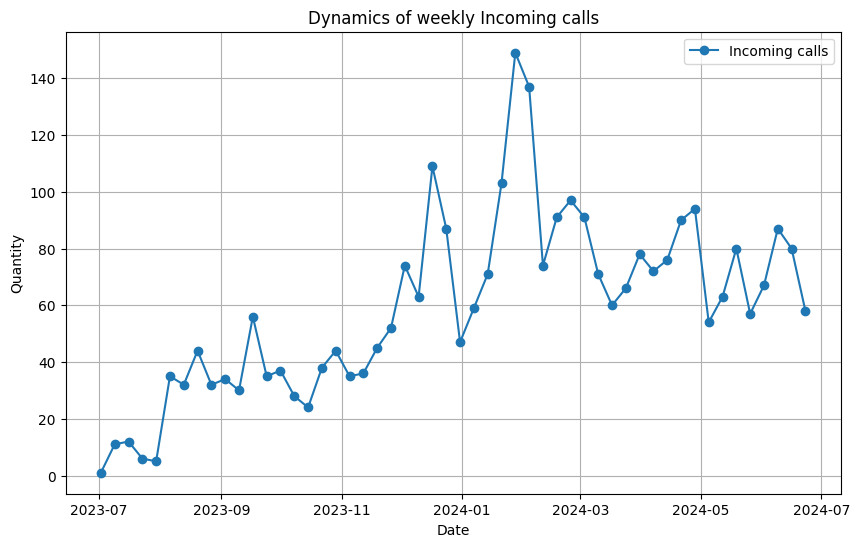

In [46]:
# If there is a column with a date and it is in the index, then we simply count the rows (calls) by week:
weekly_in_calls = inbound_filtered_calls_df.resample('W').size()

plt.figure(figsize=(10, 6))
plt.plot(weekly_in_calls.index, weekly_in_calls.values, marker='o', label='Incoming calls')
plt.title('Dynamics of weekly Incoming calls')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend()
plt.show()

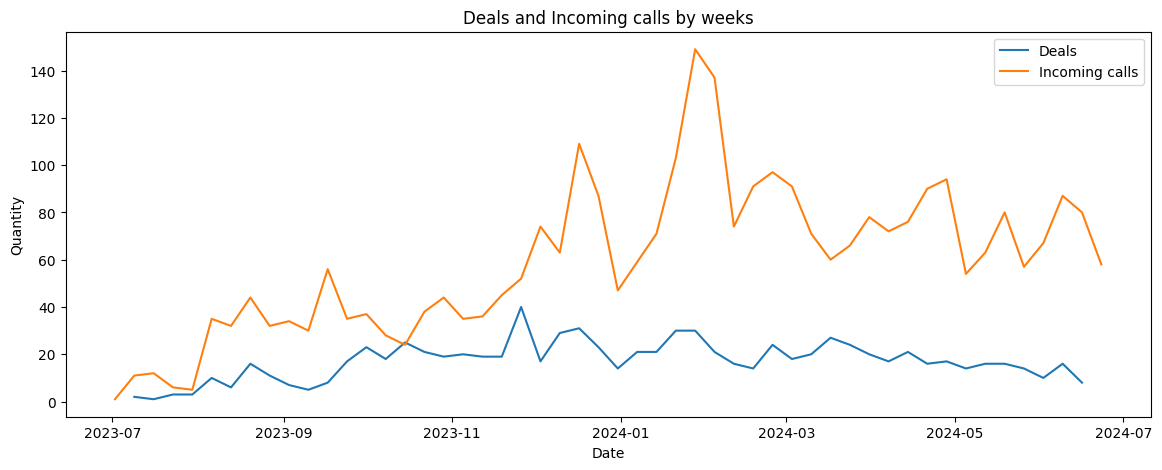

In [47]:
weekly_success_deals = successful_df.resample("W").count()['Id']  # Series

plt.figure(figsize=(14, 5))
plt.plot(weekly_success_deals, label='Deals')
plt.plot(weekly_in_calls, label='Incoming calls')
plt.title('Deals and Incoming calls by weeks')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [48]:
# Combine data by date
correlation_df = pd.DataFrame({
    'calls': weekly_in_calls,
    'deals': weekly_success_deals
}).dropna()

# Calculate the Pearson correlation coefficient
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Pearson correlation coefficient between Incoming calls (>3 sec) and deals: {correlation:.3f}")

Pearson correlation coefficient between Incoming calls (>3 sec) and deals: 0.524


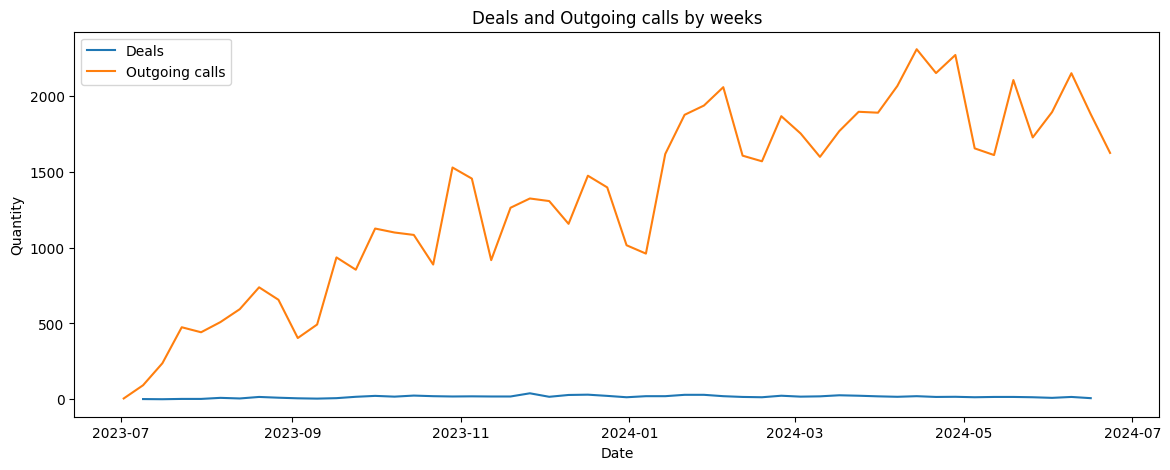

In [49]:
weekly_out_calls = outbound_filtered_calls_df.resample('W').size()

plt.figure(figsize=(14, 5))
plt.plot(weekly_success_deals, label='Deals')
plt.plot(weekly_out_calls, label='Outgoing calls')
plt.title('Deals and Outgoing calls by weeks')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [50]:
# Combine data by date
correlation_df = pd.DataFrame({
    'calls': weekly_out_calls,
    'deals': weekly_success_deals
}).dropna()

# Calculate the Pearson correlation coefficient
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Pearson correlation coefficient between Outgoing calls (>3 sec) and deals: {correlation:.3f}")

Pearson correlation coefficient between Outgoing calls (>3 sec) and deals: 0.506


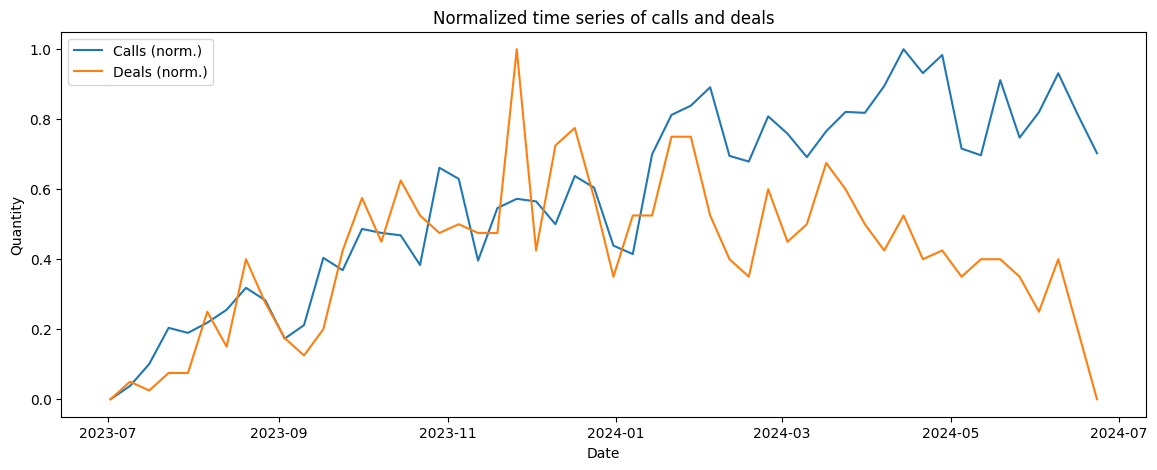

In [51]:
# Normalization of rows (MinMax Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(pd.DataFrame({
    'calls': weekly_out_calls,
    'deals': weekly_success_deals
}).fillna(0))

scaled_df = pd.DataFrame(scaled, index=weekly_out_calls.index, columns=['calls', 'deals'])

plt.figure(figsize=(14, 5))
plt.plot(scaled_df['calls'], label='Calls (norm.)')
plt.plot(scaled_df['deals'], label='Deals (norm.)')
plt.title("Normalized time series of calls and deals")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [52]:
# Filter only lost trades
lost_df = deals_df[deals_df['Stage'] == 'Lost']

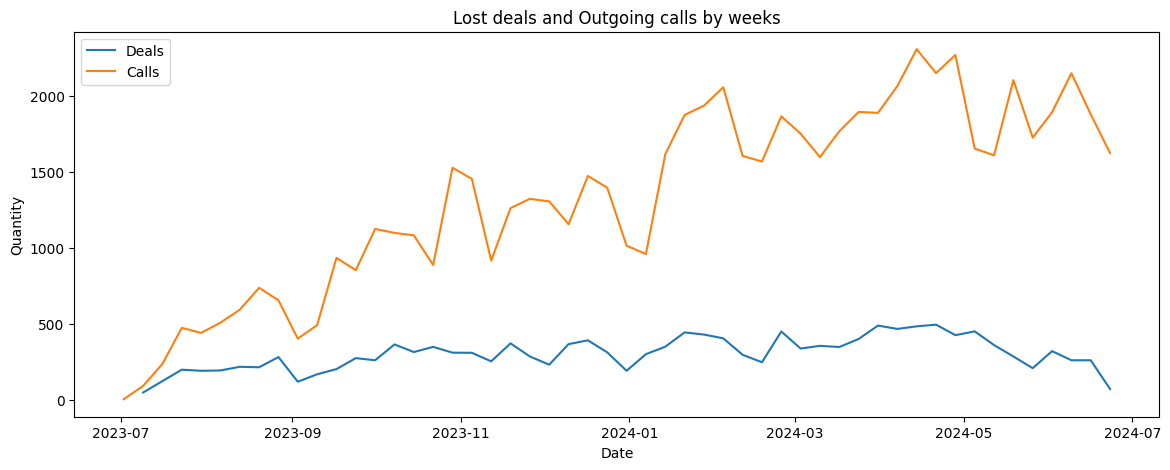

In [53]:
# check the dependence of lost deals and outgoing calls
weekly_lost_deals = lost_df.resample("W").count()['Id']  # Series

plt.figure(figsize=(14, 5))
plt.plot(weekly_lost_deals, label='Deals')
plt.plot(weekly_out_calls, label='Calls')
plt.title("Lost deals and Outgoing calls by weeks")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [54]:
# Combine data by date
correlation_df = pd.DataFrame({
    'calls': weekly_out_calls,
    'deals': weekly_lost_deals
}).dropna()

# Calculate the Pearson correlation coefficien
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Pearson correlation coefficient between Outgoing calls (>3 sec) and lost deals: {correlation:.3f}")

Pearson correlation coefficient between Outgoing calls (>3 sec) and lost deals: 0.716


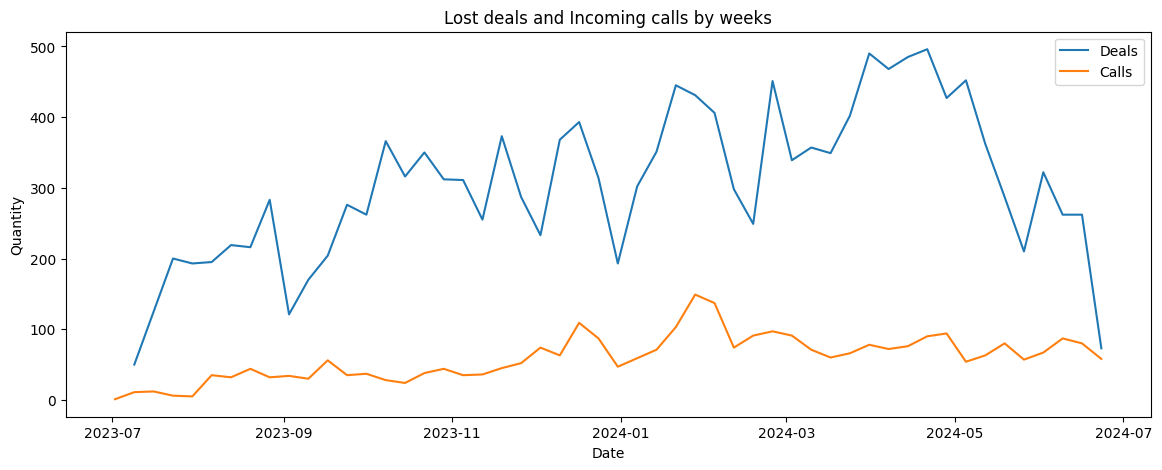

In [55]:
plt.figure(figsize=(14, 5))
plt.plot(weekly_lost_deals, label='Deals')
plt.plot(weekly_in_calls, label='Calls')
plt.title("Lost deals and Incoming calls by weeks")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [56]:
# Combine data by date
correlation_df = pd.DataFrame({
    'calls': weekly_in_calls,
    'deals': weekly_lost_deals
}).dropna()

# Calculate the Pearson correlation coefficien
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Pearson correlation coefficient between Incoming calls (>3 sec) and lost deals: {correlation:.3f}")

Pearson correlation coefficient between Incoming calls (>3 sec) and lost deals: 0.601


In [57]:
# Filtering by all Stages, because at the stage of data cleaning for Stage='Payment Done' & 'Lost' the data for Closing date was filled
open_deals_df = deals_df[deals_df['Closing Date'].isna()] 

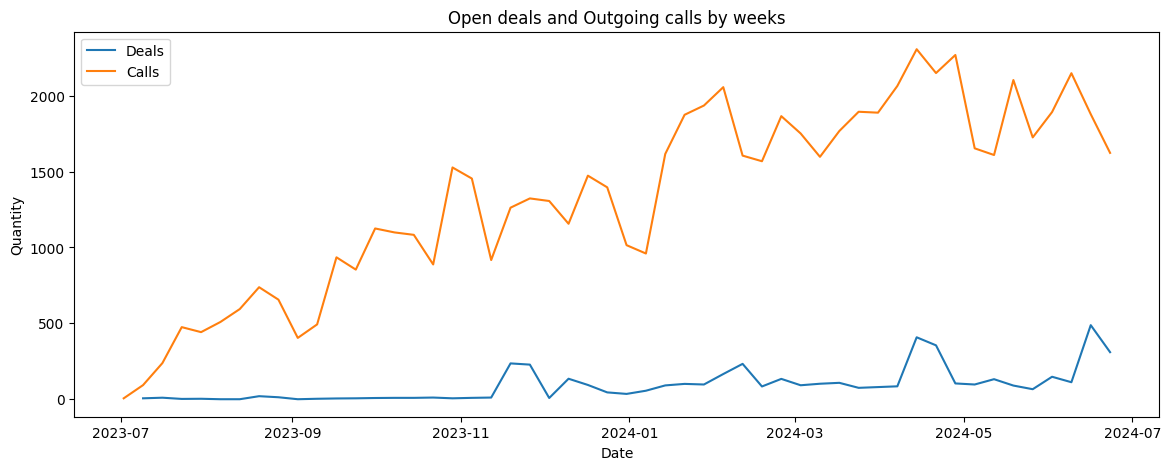

In [58]:
#Let's look at the relationship between open deals and calls
weekly_process_deals = open_deals_df.resample("W").count()['Id']  # Series

plt.figure(figsize=(14, 5))
plt.plot(weekly_process_deals, label='Deals')
plt.plot(weekly_out_calls, label='Calls')
plt.title("Open deals and Outgoing calls by weeks")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [59]:
# Combine data by date
correlation_df = pd.DataFrame({
    'calls': weekly_out_calls,
    'deals': weekly_process_deals
}).dropna()

#  Calculate the Pearson correlation coefficien
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Pearson correlation coefficient between Outgoing calls (>3 sec) and open deals: {correlation:.3f}")

Pearson correlation coefficient between Outgoing calls (>3 sec) and open deals: 0.595


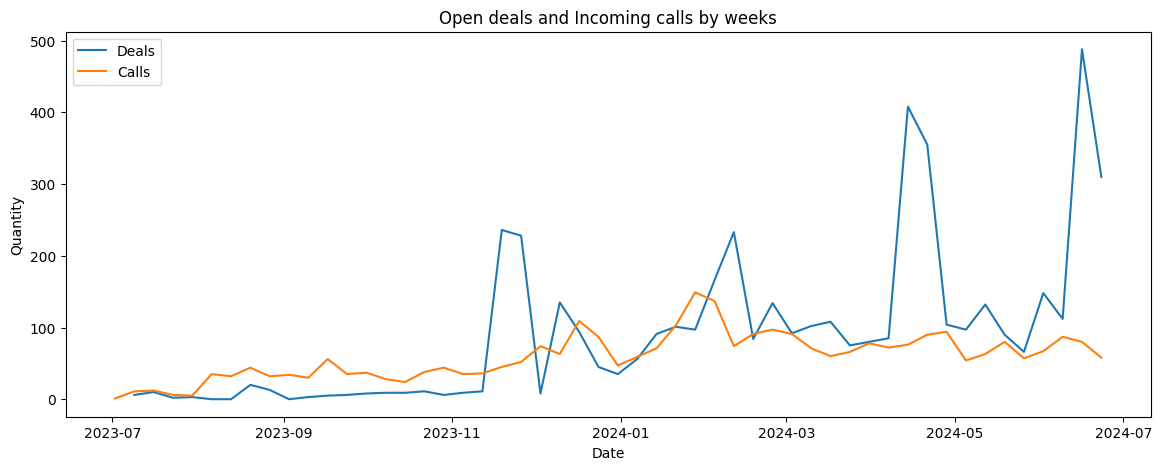

In [60]:
plt.figure(figsize=(14, 5))
plt.plot(weekly_process_deals, label='Deals')
plt.plot(weekly_in_calls, label='Calls')
plt.title("Open deals and Incoming calls by weeks")
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [61]:
# Combine data by date
correlation_df = pd.DataFrame({
    'calls': weekly_in_calls,
    'deals': weekly_process_deals
}).dropna()

#  Calculate the Pearson correlation coefficien
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Pearson correlation coefficient between Incoming calls (>3 sec) and open deals: {correlation:.3f}")

Pearson correlation coefficient between Incoming calls (>3 sec) and open deals: 0.444


In [31]:
# If correlation > 0.5 — we can say that the connection is noticeable.

# If 0.2 < correlation < 0.5 — weak, but may be important under other conditions.

# If < 0.2 — most likely, calls and deals are not strongly directly related (including in time).

## 2. Изучите распределение времени закрытия сделок и продолжительность периода от создания до закрытия.

In [62]:
deals_df_2 = pd.read_pickle("deals_cleaned_v3.pkl")
deals_df_2.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Create_to_Close_Days,SLA_range
0,5805028000056864695,Ben Hall,NaT,B - Medium,New Lead,NaN,/eng/test,03.07.23women,NaT,v16,...,NaN,<NA>,NaN,NaN,5805028000056849495,NaN,NaN,2024-06-21,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaT,B - Medium,New Lead,NaN,/at-eng,NaN,NaT,NaN,...,6,<NA>,NaN,2000.0,5805028000056834471,NaN,NaN,2024-06-21,NaN,NaN
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_at,0 days 00:26:43,b1-at,...,NaN,<NA>,NaN,NaN,5805028000056854421,NaN,NaN,2024-06-21,0.0,Medium (15-30 min)
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_de,0 days 01:00:04,bloggersvideo14com,...,NaN,<NA>,NaN,NaN,5805028000056889351,NaN,NaN,2024-06-21,0.0,Very slow (>60 min)
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_de,0 days 00:53:12,website,...,NaN,<NA>,NaN,NaN,5805028000056876176,NaN,NaN,2024-06-21,0.0,Slow (30-60 min)


In [63]:
# Remove rows with empty Closing Date for correct timseries
close_all_deals_df = deals_df_2[deals_df_2['Closing Date'].notna()].copy()

# Set Closing Date as index
close_all_deals_df.set_index('Closing Date', inplace=True)

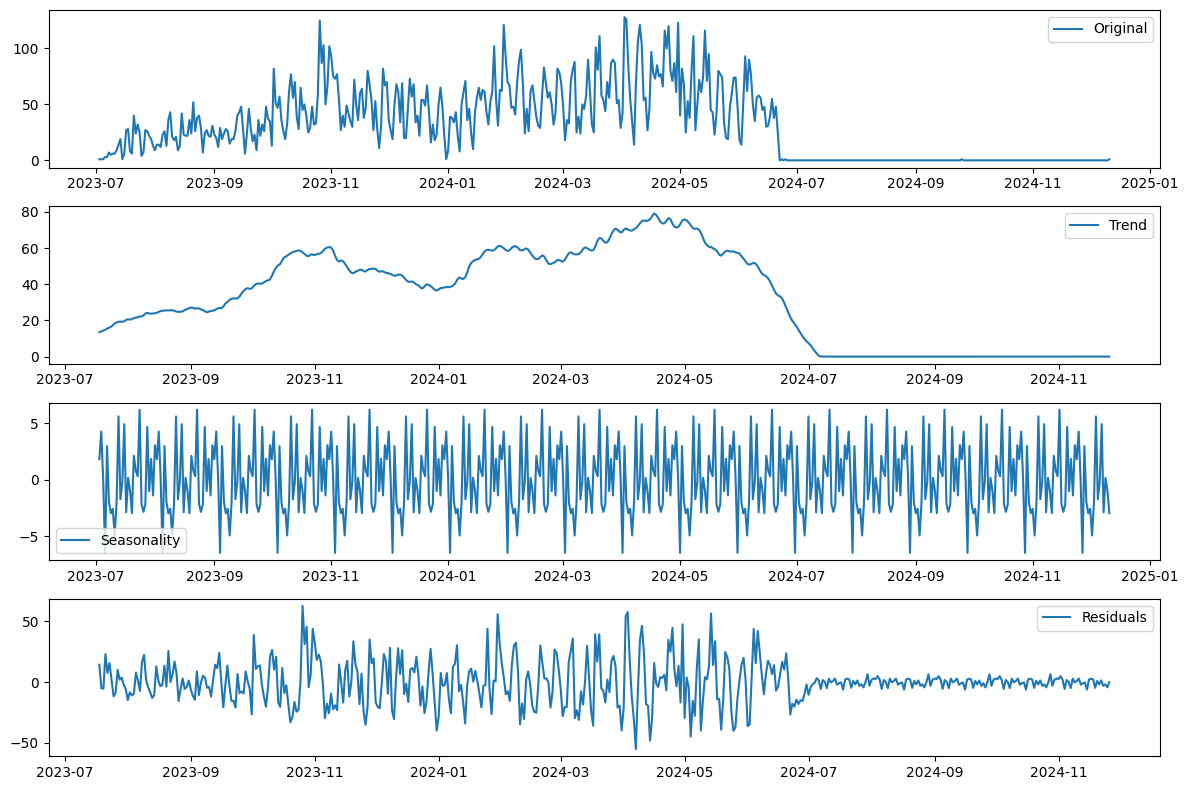

In [64]:
# Aggregate: count the number of all deals each day
daily_close_deals = close_all_deals_df.resample("D").size()  # time series by days

# Decomposition of the time series (period - 7, if we think that there is weekly seasonality)
decomposition = seasonal_decompose(daily_close_deals, model='additive', period=30)

# Extracting the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_close_deals, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [65]:
daily_close_deals.tail(10)

Closing Date
2024-12-02    0
2024-12-03    0
2024-12-04    0
2024-12-05    0
2024-12-06    0
2024-12-07    0
2024-12-08    0
2024-12-09    0
2024-12-10    0
2024-12-11    1
Freq: D, dtype: int64

In [66]:
deals_df_2[deals_df_2['Closing Date'] == '2024-12-11']

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Create_to_Close_Days,SLA_range
12668,5805028000025477353,Nina Scott,2024-12-11,D - Non Target,Lost,Non target,/eng/test,bloggershina_de,0 days 00:18:19,NaN,...,NaN,<NA>,NaN,NaN,5805028000016832230,NaN,NaN,2024-01-11,335.0,Medium (15-30 min)


In [67]:
successfull_close_df = close_all_deals_df[close_all_deals_df['Stage'] == 'Payment Done']

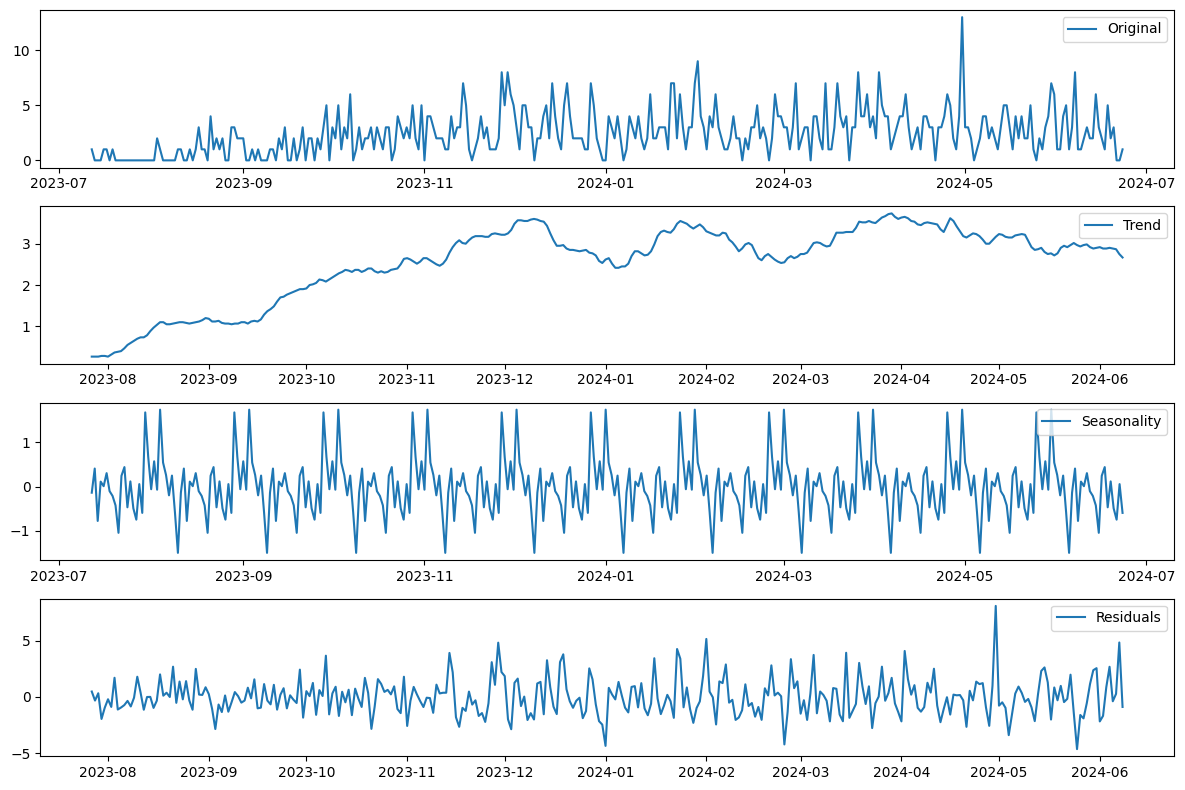

In [68]:
# Aggregate: count the number of successful deals each day
daily_close_success_deals = successfull_close_df.resample("D").size()  # time series by days
# Decomposition of the time series (period - 7, if we think that there is weekly seasonality)
decomposition = seasonal_decompose(daily_close_success_deals, model='additive', period=30)

# Extracting the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_close_success_deals, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [69]:
success_with_common_index = deals_df_2[deals_df_2['Stage'] == 'Payment Done']

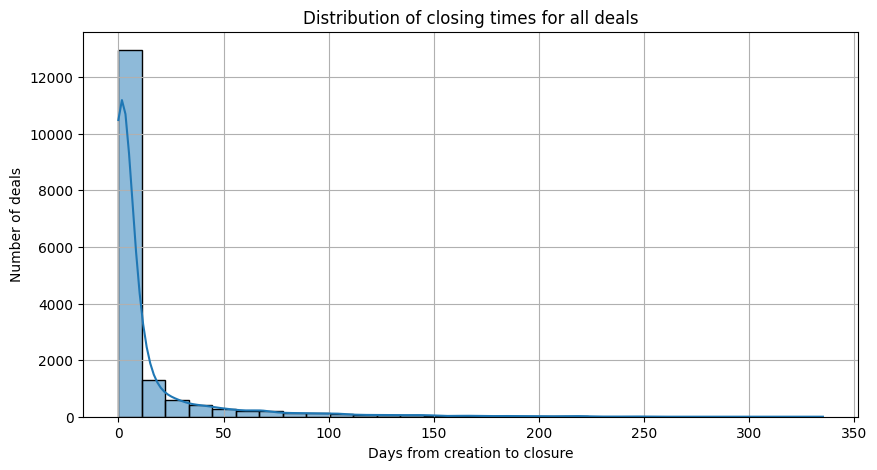

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(deals_df_2['Create_to_Close_Days'].dropna(), bins=30, kde=True)
plt.title("Distribution of closing times for all deals")
plt.xlabel("Days from creation to closure")
plt.ylabel("Number of deals")
plt.grid(True)
plt.show()

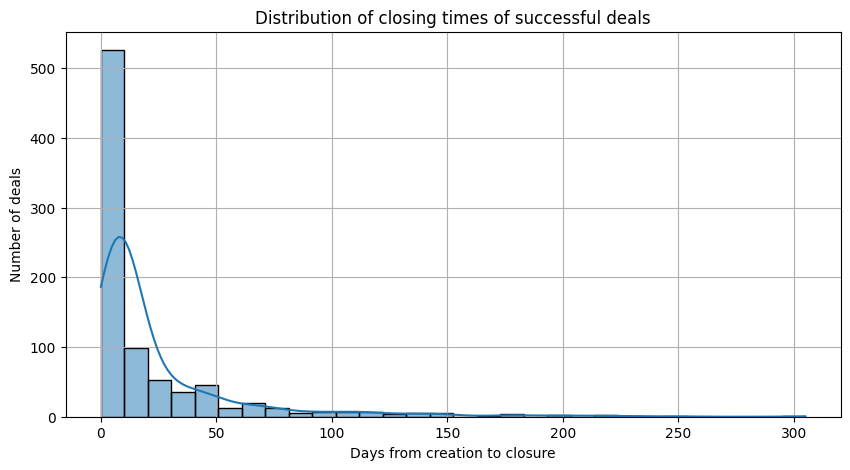

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(success_with_common_index['Create_to_Close_Days'].dropna(), bins=30, kde=True)
plt.title("Distribution of closing times of successful deals")
plt.xlabel("Days from creation to closure")
plt.ylabel("Number of deals")
plt.grid(True)
plt.show()

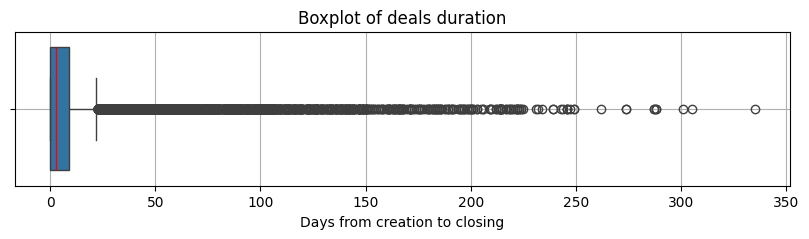

In [72]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=deals_df_2['Create_to_Close_Days'].dropna(),medianprops=dict(color='red'))
plt.title('Boxplot of deals duration')
plt.xlabel("Days from creation to closing")
plt.grid(True)
plt.show()

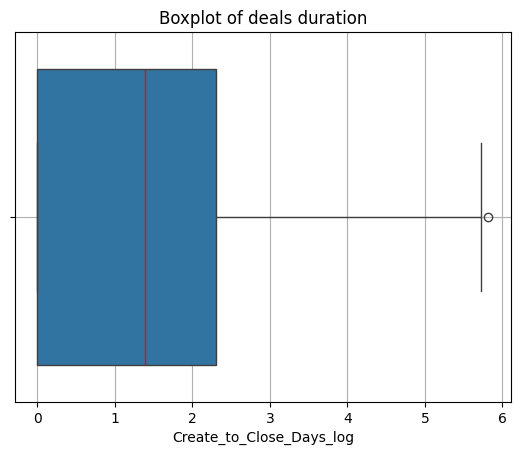

In [73]:
# Let's take the logarithm of the scale for clarity
import numpy as np
deals_df_2['Create_to_Close_Days_log'] = np.log1p(deals_df_2['Create_to_Close_Days'])

sns.boxplot(x=deals_df_2['Create_to_Close_Days_log'].dropna(), medianprops=dict(color='red'))
plt.title("Boxplot of deals duration")
plt.grid(True)
plt.show()

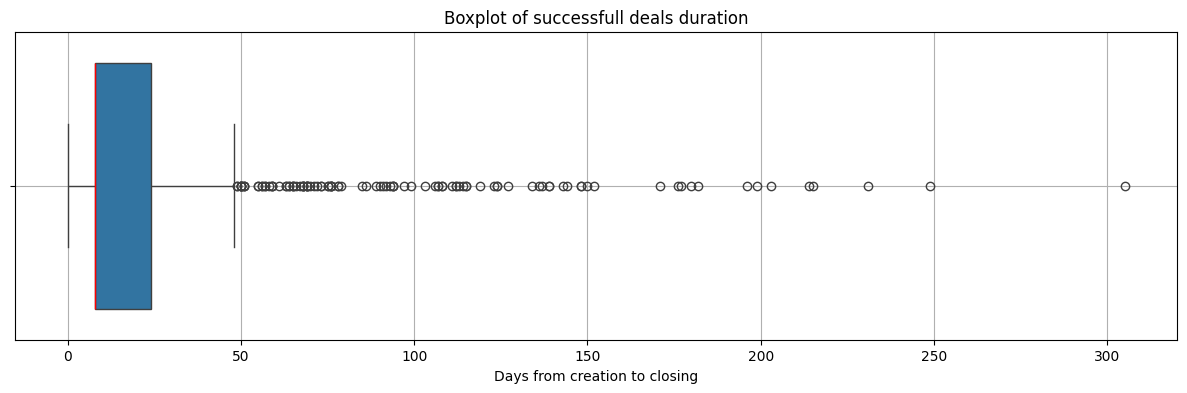

In [74]:
plt.figure(figsize=(15, 4))
sns.boxplot(x=success_with_common_index['Create_to_Close_Days'].dropna(),medianprops=dict(color='red'))
plt.title('Boxplot of successfull deals duration')
plt.xlabel("Days from creation to closing")
plt.grid(True)
plt.show()

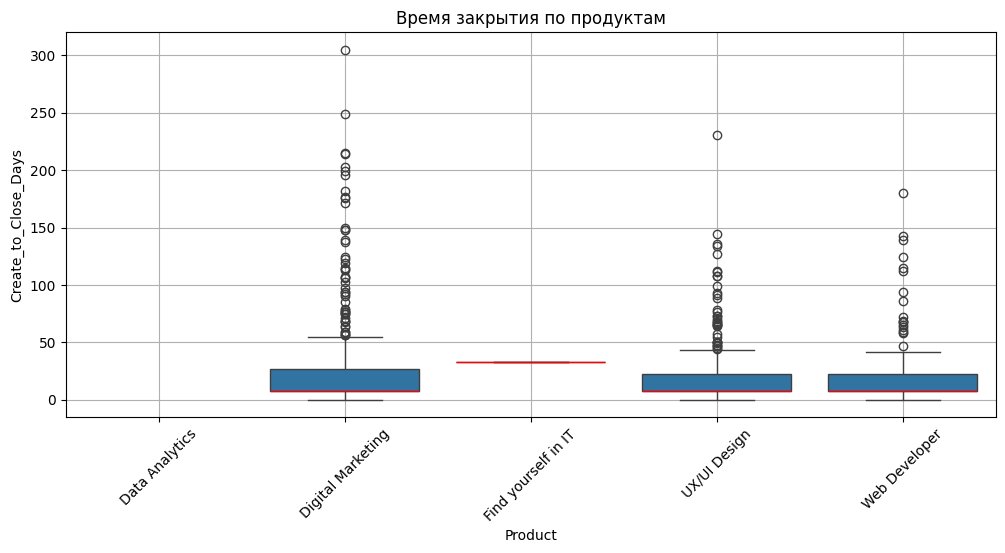

In [75]:
# df_tmp = successfull.reset_index(drop=True) # сбросить индекс и удалить старый (дату) из столбцов
plt.figure(figsize=(12, 5))
sns.boxplot(x='Product', y='Create_to_Close_Days', data=success_with_common_index.dropna(subset=['Create_to_Close_Days']),medianprops=dict(color='red'))
plt.title("Время закрытия по продуктам")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

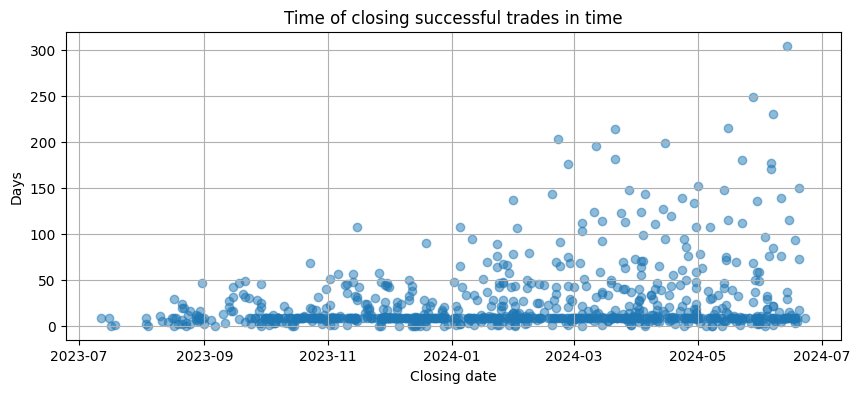

In [76]:
plt.figure(figsize=(10, 4))
plt.scatter(success_with_common_index['Closing Date'], success_with_common_index['Create_to_Close_Days'], alpha=0.5)
plt.title("Time of closing successful trades in time")
plt.xlabel("Closing date")
plt.ylabel("Days")
plt.grid(True)
plt.show()

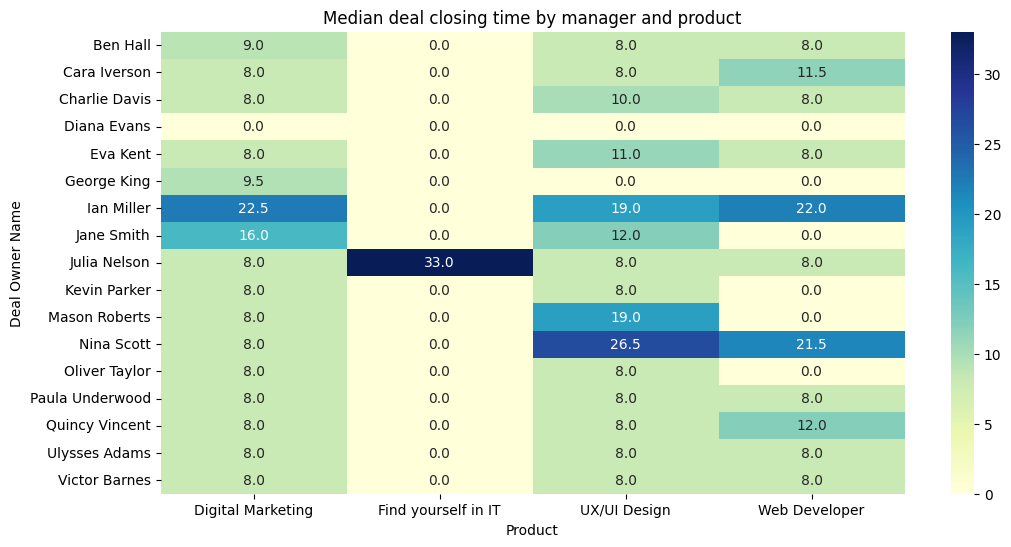

In [77]:
pivot = success_with_common_index.pivot_table(
    index='Deal Owner Name',
    columns='Product',
    values='Create_to_Close_Days',
    aggfunc='median', observed=False
) .fillna(0) # Replace NaNs with 0

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Median deal closing time by manager and product")
plt.show()